
---
Title: 'Assigment 1 - Big Data Visualization for Business Communications'  
Author: "Carlos M. Munoz Ebratt"  
Date: "February 6th, 2024"  
---



# Flight Price

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_excel('https://github.com/ishantg3/DSMM_T2_G3_2024W/blob/main/flight_price.xlsx?raw=true')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


> Before start doing the analysis I would prefer to do some transformation to have a clean dataset

In [52]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [53]:
# Convert the date columns to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

In [54]:
# Transform Departure Time to Hour and Minute and dropping the original column

df["Dep_hour"]=df["Dep_Time"].str.split(":").str[0]
df["Dep_min"]=df["Dep_Time"].str.split(":").str[0]
df.drop("Dep_Time", axis=1, inplace=True)

In [55]:
# Transform Arrival Time to Hour and Minute and dropping the original column

df["Arrival_hour"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]
df["Arrival_min"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1]
df.drop("Arrival_Time", axis=1, inplace=True)

In [56]:
# Transform Duration to minutes and dropping the original column

df["DurationH"]=df["Duration"].str.split("h").str[0]
df["DurationM"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0]

df["DurationM"] = pd.to_numeric(df["DurationH"], errors='coerce').fillna(0).astype(int)
df["DurationH"] = pd.to_numeric(df["DurationH"], errors='coerce').fillna(0).astype(int)

df["Duration_minutes"] =  (df["DurationH"] * 60 ) + df["DurationM"] 

# Dropping unnecessary columns
df.drop(["DurationH", "DurationM", "Route", "Duration", "Additional_Info"], axis=1, inplace=True)

In [57]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,3897,22,22,01,10,122
1,Air India,2019-05-01,Kolkata,Banglore,2 stops,7662,05,05,13,15,427
2,Jet Airways,2019-06-09,Delhi,Cochin,2 stops,13882,09,09,04,25,1159
3,IndiGo,2019-05-12,Kolkata,Banglore,1 stop,6218,18,18,23,30,305
4,IndiGo,2019-03-01,Banglore,New Delhi,1 stop,13302,16,16,21,35,244


> Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [58]:
df.shape

(10683, 11)

> Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

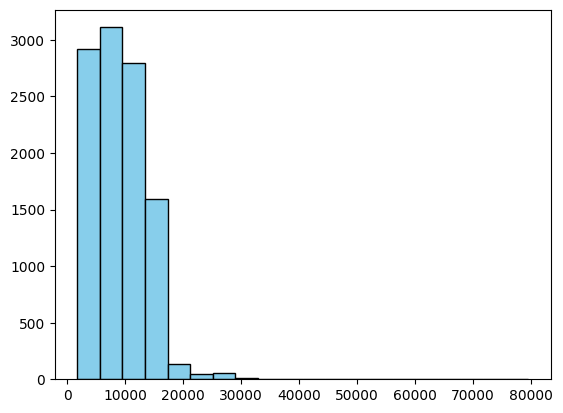

In [59]:
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.show()

> Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [60]:
min_price = df['Price'].min()
max_price = df['Price'].max()

print("The minimun price is: ", min_price, ", and the maximum price is: ",max_price)

The minimun price is:  1759 , and the maximum price is:  79512


> Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines

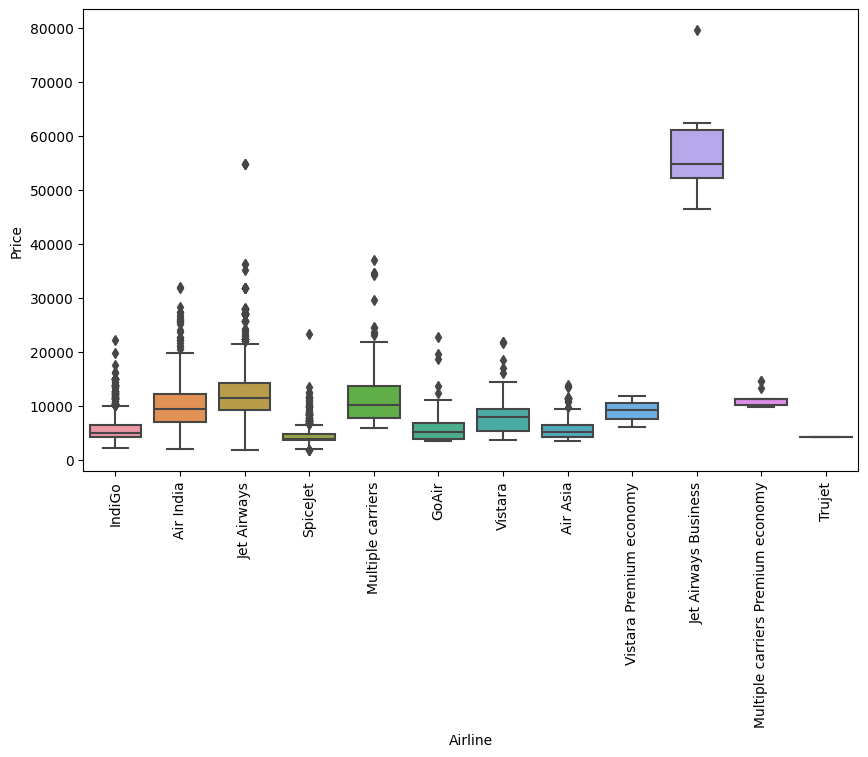

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Airline", y="Price")
plt.xticks(rotation=90)
plt.show()

> Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

> To answer this question, I'll use the the EMpirical Rule to identify the outliers.  
The Empirical Rule states that for a normal distribution:  
68% of the data falls within one standard deviation of the mean  
95% falls within two standard deviations  
99.7% falls within three standard deviations  


<Axes: >

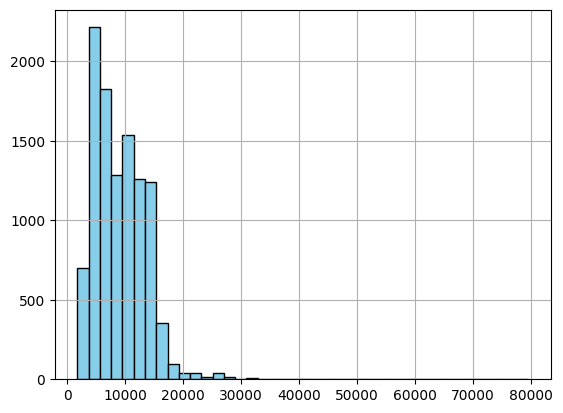

In [62]:
# Lets first identify the shape of the distribution of the prices
df["Price"].hist(bins=40, color='skyblue', edgecolor='black')

> Second, we can compute the actual percentage of values that satisfies the criterion of the empirical rule by finding the mean, and standard deviation, and calculate lower and upper limits for 1, 2 and 3 standard deviations ranges.

In [63]:
col_mean = df["Price"].mean()
col_std = df["Price"].std()

lower_limit = col_mean - (1 * col_std)
upper_limit = col_mean + (1 * col_std)
percentage = ((df["Price"] >= lower_limit) & (df["Price"] <= upper_limit)).mean() * 100
print("Percentage of data within 1 std: ", percentage)

lower_limit = col_mean - (2 * col_std)
upper_limit = col_mean + (2 * col_std)
percentage = ((df["Price"] >= lower_limit) & (df["Price"] <= upper_limit)).mean() * 100
print("Percentage of data within 2 std: ", percentage)

lower_limit = col_mean - (3 * col_std)
upper_limit = col_mean + (3 * col_std)
percentage = ((df["Price"] >= lower_limit) & (df["Price"] <= upper_limit)).mean() * 100
print("Percentage of data within 3 std: ", percentage)


Percentage of data within 1 std:  68.46391463072172
Percentage of data within 2 std:  97.95937470747917
Percentage of data within 3 std:  99.10137601797247


> It seems that the percentage we calculated are near to the criteria.  
> Now let’s calculate the Z-Score. This can be done easily by using the Z-score function from the “stats” module in Scipy, and the filtering the values that are 3 standard deviations far from te mean.

In [64]:
from scipy import stats
df["z_score"] = stats.zscore(df["Price"])
df[(df["z_score"] < -3) | (df["z_score"] > 3)]

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_minutes,z_score
123,Air India,2019-03-01,Delhi,Cochin,1 stop,27430,23,23,19,15,1220,3.977958
396,Multiple carriers,2019-03-01,Delhi,Cochin,1 stop,36983,12,12,19,15,366,6.049679
486,Jet Airways,2019-03-01,Banglore,New Delhi,1 stop,26890,08,08,15,15,366,3.860851
510,Jet Airways,2019-03-01,Banglore,New Delhi,1 stop,26890,07,07,12,25,305,3.860851
597,Air India,2019-03-06,Mumbai,Hyderabad,2 stops,25139,09,09,15,15,1769,3.481118
...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,2019-03-06,Mumbai,Hyderabad,2 stops,24210,19,19,16,50,1281,3.279650
10364,Jet Airways Business,2019-03-01,Banglore,New Delhi,1 stop,57209,09,09,14,25,244,10.436010
10383,Jet Airways,2019-03-01,Banglore,New Delhi,1 stop,26890,07,07,05,05,1342,3.860851
10439,Jet Airways,2019-03-01,Banglore,New Delhi,1 stop,31825,18,18,09,00,854,4.931084


In [65]:
# Dropping values with z-score > 3
df_new = df[(df["z_score"] > -3) & (df["z_score"] < 3)]
df_new[(df_new["z_score"] < -3) | (df_new["z_score"] > 3)]

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_minutes,z_score


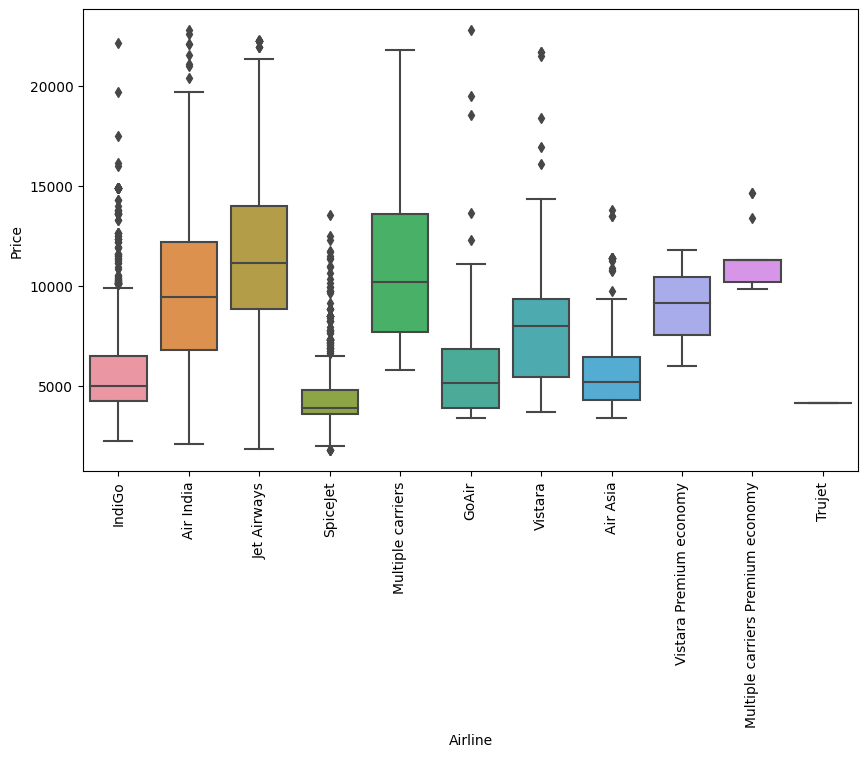

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_new, x="Airline", y="Price")
plt.xticks(rotation=90)
plt.show()

> Finally, I found that what I thought it was an outlier, is actually a valid price, so I will not drop any value

> Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

> A: I could check the distribution of trips amid quarters.

In [67]:
df['Year'] = df['Date_of_Journey'].dt.year
df['Quarter'] = df['Date_of_Journey'].dt.quarter

subset = df.groupby(['Year', 'Quarter']).size().reset_index(name='Total Travels')
subset.head()


,Year,Quarter,Total Travels
0,2019,1,2724
1,2019,2,7959


> After evaluating, I could identify that there are just records of trips belonging to months from January to June. I this case, one possible solution is to check by month.

In [68]:
df['Month'] = df['Date_of_Journey'].dt.strftime('%B')
subset = df.groupby(['Year', 'Month']).size().reset_index(name='Total Travels')
subset = subset.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)
subset.head()

,Year,Month,Total Travels
2,2019,March,2724
0,2019,April,1079
3,2019,May,3466
1,2019,June,3414


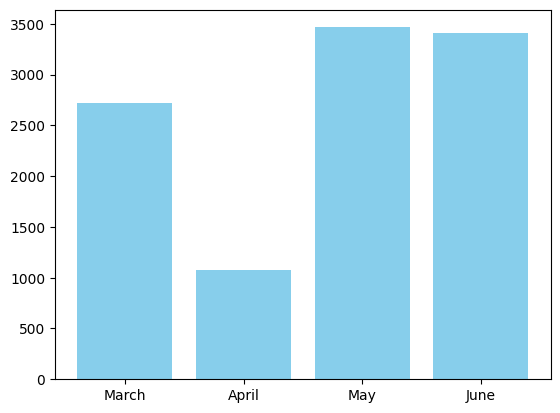

In [69]:

plt.bar(subset['Month'], subset['Total Travels'], color='skyblue')
plt.show()

> Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

> A: First, I could create a subset grouping by Airline and getting the average value.  
Then, I could do the same but by month

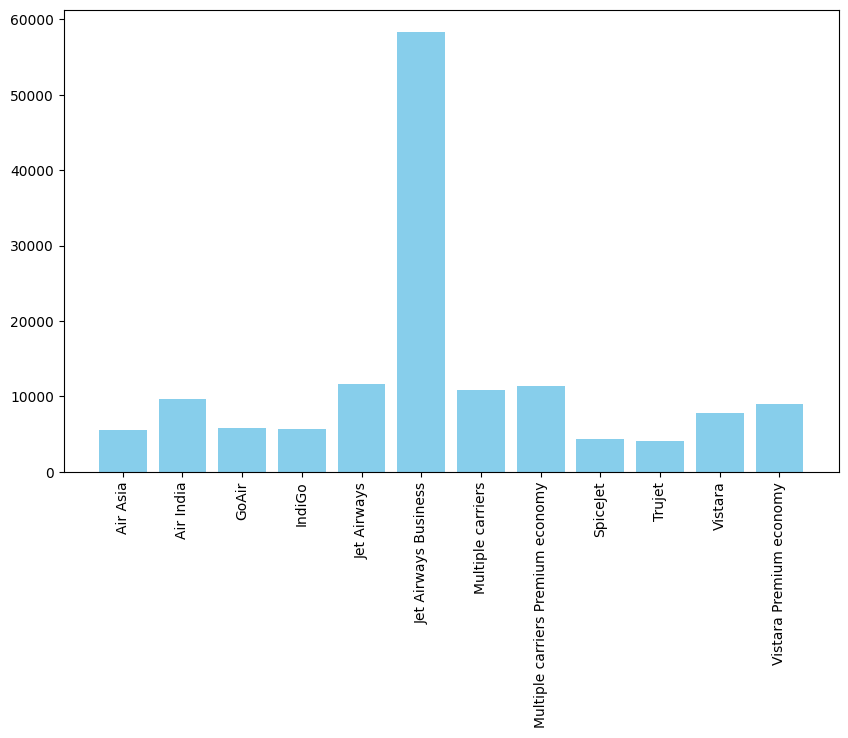

In [70]:
# Analizing trends in prices by airline and month
subset = df.groupby('Airline').agg({'Price': 'mean'}).reset_index()
# subset = subset.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)

plt.figure(figsize=(10,6))
plt.bar(subset['Airline'], subset['Price'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

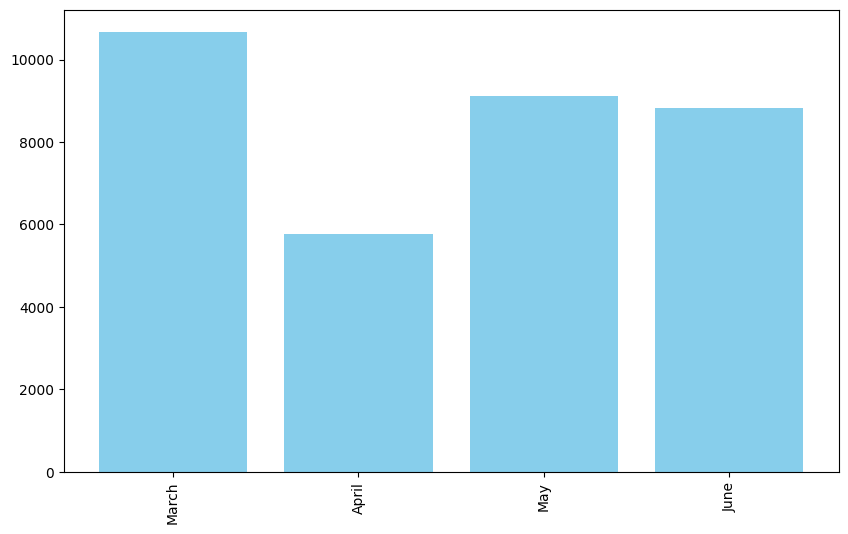

In [71]:
# Analizing trends in prices by month
subset = df.groupby('Month').agg({'Price': 'mean'}).reset_index()
subset = subset.sort_values('Month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)

plt.figure(figsize=(10,6))
plt.bar(subset['Month'], subset['Price'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

> Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?  

> A: To see if there are factors affecting flight prices I could plot a scatter for pair of features like Price-Duration.

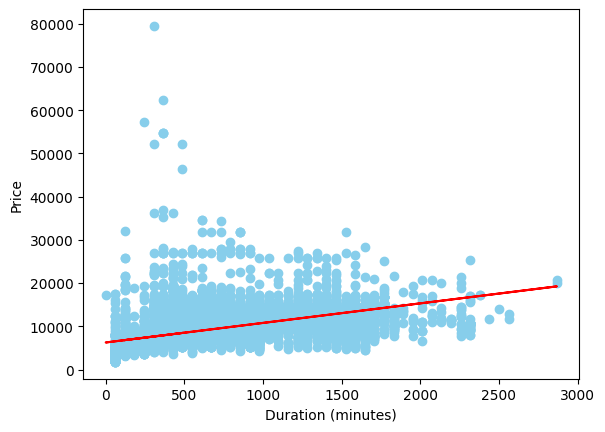

The correlation between price and duration is:  0.5086722015237887


In [72]:
import numpy as np
# Calculate the coefficients of the polynomial regression line
coefficients = np.polyfit(df['Duration_minutes'], df['Price'], 1)

# Create a polynomial function based on the coefficients
trend_line = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(df['Duration_minutes'], df['Price'], color='skyblue')

# Plot the trend line
plt.plot(df['Duration_minutes'], trend_line(df['Duration_minutes']), color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()

# Calculating Pearson correlation coefficient between price and duration of the flight
correlation = df['Duration_minutes'].corr(df['Price'])
print("The correlation between price and duration is: ", correlation)


> The Pearson correlation coefficient is 0.506, which indicates a moderate positive correlation between the duration of the flight and the price. This means that as the duration of the flight increases, the price also increases, and vice versa.


# Google Playstore

> Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.shape

(10841, 13)

> Before continue answering stakeholder's question I'd prefer to check if there are any transformation to do and/or rows to drop.

In [74]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [75]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [76]:
df[df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [77]:
# Dropping the row with Installs = Free
df = df.drop(df[df['Installs'] == 'Free'].index)

In [78]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [79]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [80]:
# Removing the $ sign from the Price column and , and + from the Installs column.
chars_to_remove = [',','+','$','Free']
cols = ['Installs', 'Price']

for i in cols:
    for j in chars_to_remove:
        df[i] = df[i].str.replace(j,'')

# Converting the columns to the correct data types
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(float)


# Converting the Last Updated column to datetime   
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Extracting the day, month and year from the Last Updated column
df['day'] = df['Last Updated'].dt.day
df['month'] = df['Last Updated'].dt.month
df['year'] = df['Last Updated'].dt.year

# Dropping duplicates
df.drop_duplicates(subset=['App'], inplace=True, keep='last')

# Transforming the Size column to numeric
def convert_size(size):
    if 'M' in size:
        return int(float(size.replace('M',''))*1000)
    elif 'k' in size:
        return float(size.replace('k',''))
    elif 'Varies with device' in size:
        return np.nan
    else:
        return np.nan
    
df['Size'] = df['Size'].apply(convert_size)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017


> Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

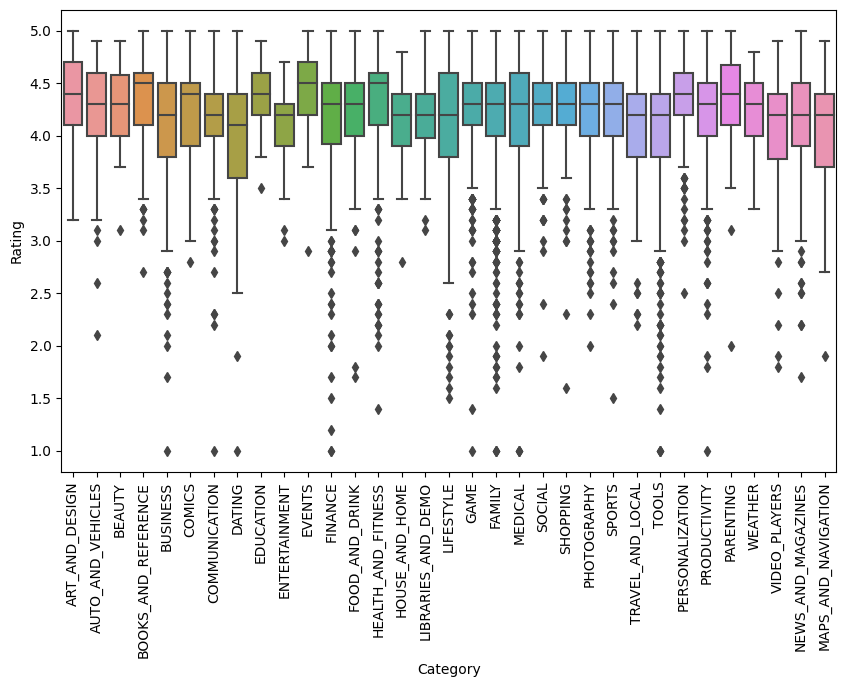

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Category", y="Rating")
plt.xticks(rotation=90)
plt.show()

> Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

> A: Previously we identified 10841 total observations in the dataset, and there are 1463 missing values in the Rating column which is a ~13% of the total.  
If we do not fill these missed values it can impact the accuracy of our model and/or our analysis and likely to come up with wrong insights to stakeholders.  
I'll fill up these values with the mean.

In [82]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [83]:
df['Rating'] = df['Rating'].groupby(df['Category']).transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

> Let's check how the rating by category varies after filling the null values.

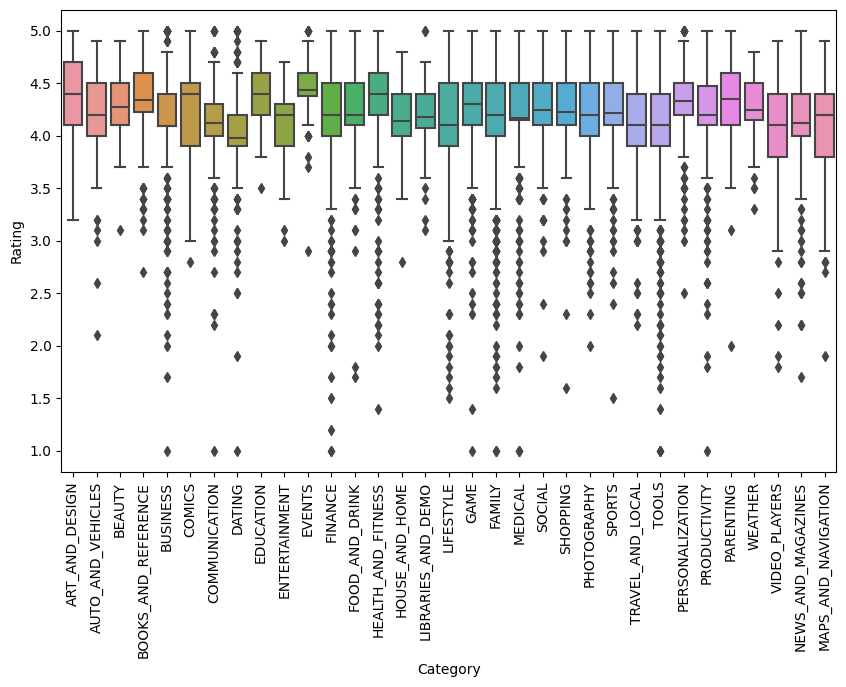

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Category", y="Rating")
plt.xticks(rotation=90)
plt.show()

> Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

>A: There is no a relationship or not a correlation deducted from the scatterplot.

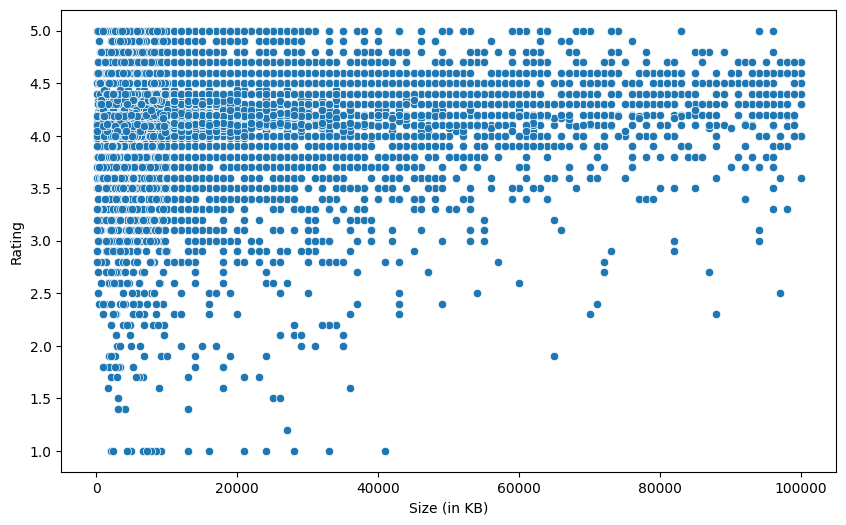

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Size", y="Rating")
plt.xlabel('Size (in KB)')
plt.ylabel('Rating')
plt.show()

> Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
> For me it do not make sense to compare Type Vs Avg. Price since we have Paid or Free, but it make sense if we evaluate Content Rating Vs Avg. Price.

In [86]:
subset = df.groupby('Type')["Price"].mean().reset_index()
subset

,Type,Price
0,Free,0.000000
1,Paid,14.055902


In [87]:
subset = df.groupby('Content Rating')["Price"].mean().reset_index().rename(columns={"Price": "Avg. Price"})
subset

,Content Rating,Avg. Price
0,Adults only 18+,0.000000
1,Everyone,1.227388
2,Everyone 10+,0.433851
3,Mature 17+,0.259847
4,Teen,0.633475
5,Unrated,0.000000


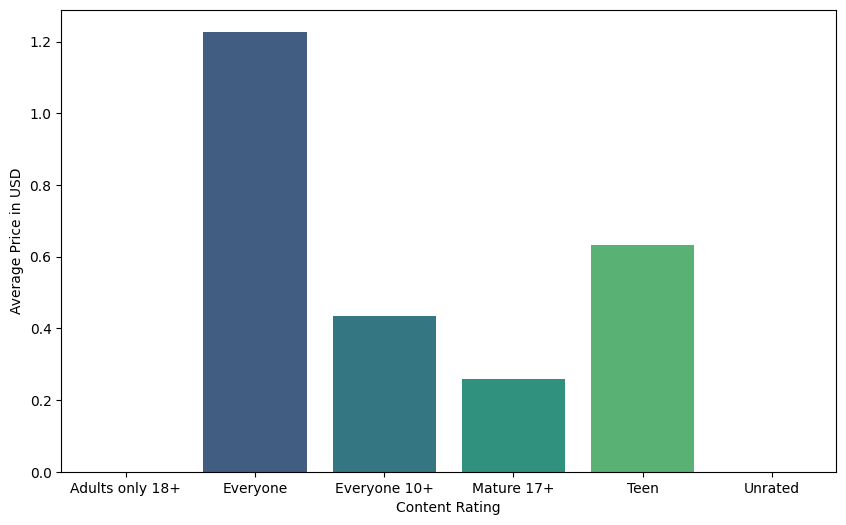

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(data=subset, x="Content Rating", y="Avg. Price", palette='viridis')
plt.xlabel('Content Rating')
plt.ylabel('Average Price in USD')
plt.show()

> Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [89]:
# Creating a frequecy table  for the number of installs
top_10_installs = df.sort_values('Installs', ascending=False).head(10)
top_10_installs

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
4153,Hangouts,COMMUNICATION,4.0,3419464,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,21,7,2018
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,1,8,2018
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
3928,YouTube,VIDEO_PLAYERS,4.3,25623548,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,2,8,2018
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,3,8,2018
4144,Google+,SOCIAL,4.2,4828372,NaN,1000000000,Free,0.0,Teen,Social,2018-07-26,Varies with device,Varies with device,26,7,2018
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
4096,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
4170,Google Drive,PRODUCTIVITY,4.4,2728941,NaN,1000000000,Free,0.0,Everyone,Productivity,2018-07-30,Varies with device,Varies with device,30,7,2018


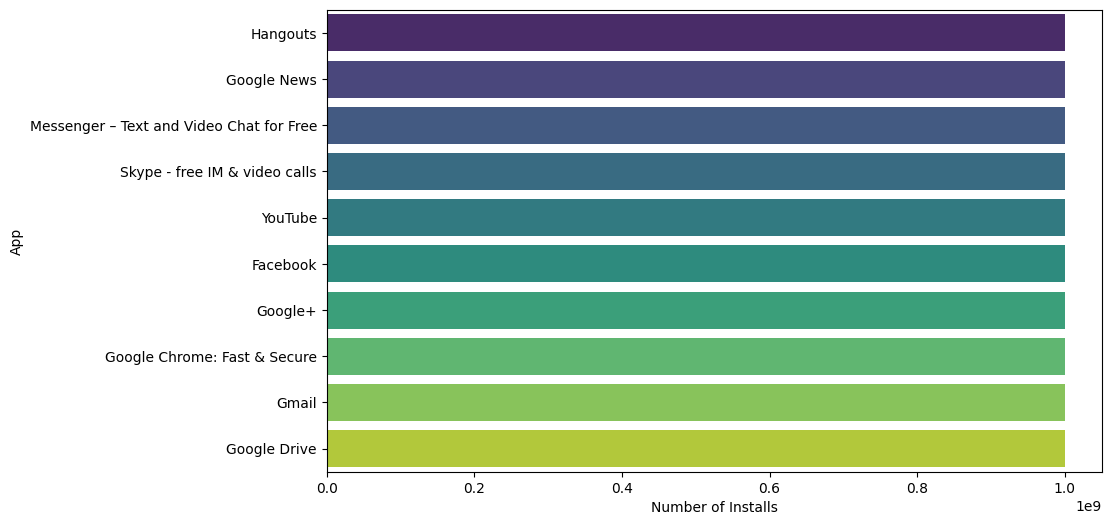

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_installs, x="Installs", y="App", palette='viridis')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.show()

> Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

> A: To respond the question I'd analyze the Avg. Rating and the total installs by category.

In [91]:
avg_rating_by_category = df.groupby('Category').agg({'Rating' : 'mean'}).reset_index().sort_values('Rating', ascending=False)
avg_rating_by_category = avg_rating_by_category.head(20)
avg_rating_by_category

,Category,Rating
10,EVENTS,4.435556
0,ART_AND_DESIGN,4.359322
8,EDUCATION,4.351485
3,BOOKS_AND_REFERENCE,4.344970
23,PERSONALIZATION,4.332215
22,PARENTING,4.300000
2,BEAUTY,4.278571
27,SOCIAL,4.247291
32,WEATHER,4.243056
15,HEALTH_AND_FITNESS,4.241975


In [92]:
total_installs_by_category = df.groupby('Category').agg({'Installs' : 'sum'}).sort_values('Installs', ascending=False).reset_index()
total_installs_by_category = total_installs_by_category.head(20)
total_installs_by_category

,Category,Installs
0,COMMUNICATION,11039276251
1,GAME,10897924415
2,FAMILY,8870642505
3,TOOLS,8102771915
4,PRODUCTIVITY,5788091369
5,SOCIAL,5487867902
6,PHOTOGRAPHY,4658147655
7,VIDEO_PLAYERS,3917002720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


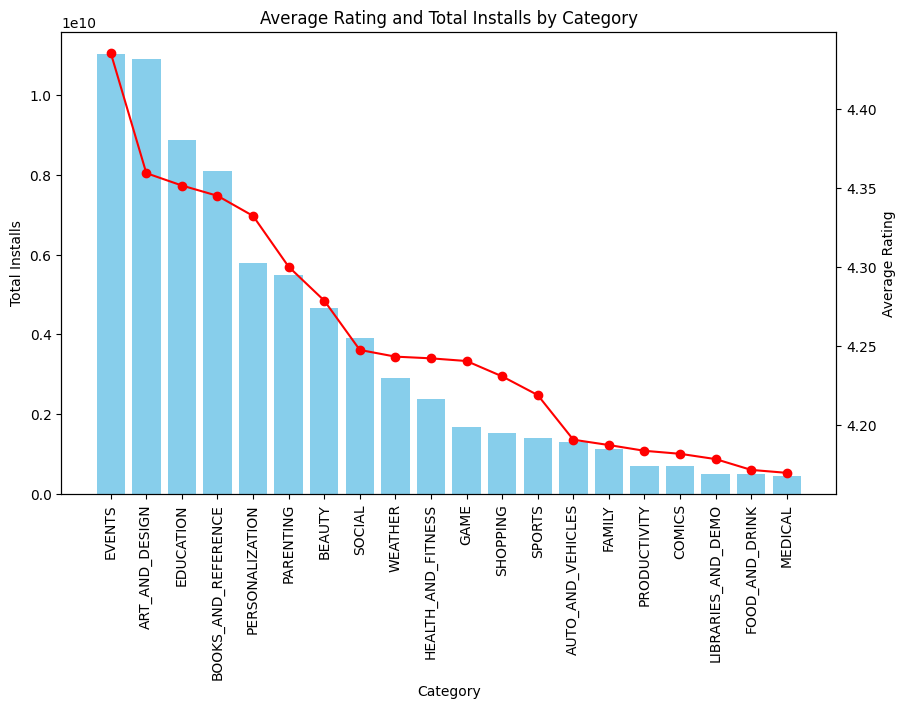

In [93]:
# Bar chart for avg_rating_by_category
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(total_installs_by_category['Category'], total_installs_by_category['Installs'], color='skyblue')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Installs')
ax1.set_title('Average Rating and Total Installs by Category')
ax1.tick_params(axis='x', rotation=90)

# Line chart for total_installs_by_category
ax2 = ax1.twinx()
ax2.plot(avg_rating_by_category['Category'], avg_rating_by_category['Rating'], marker='o', color='red')
ax2.set_ylabel('Average Rating')

plt.show()


> Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

> A: I could measure "Success" in terms of total revenue by multiplying the price by the total downloads.

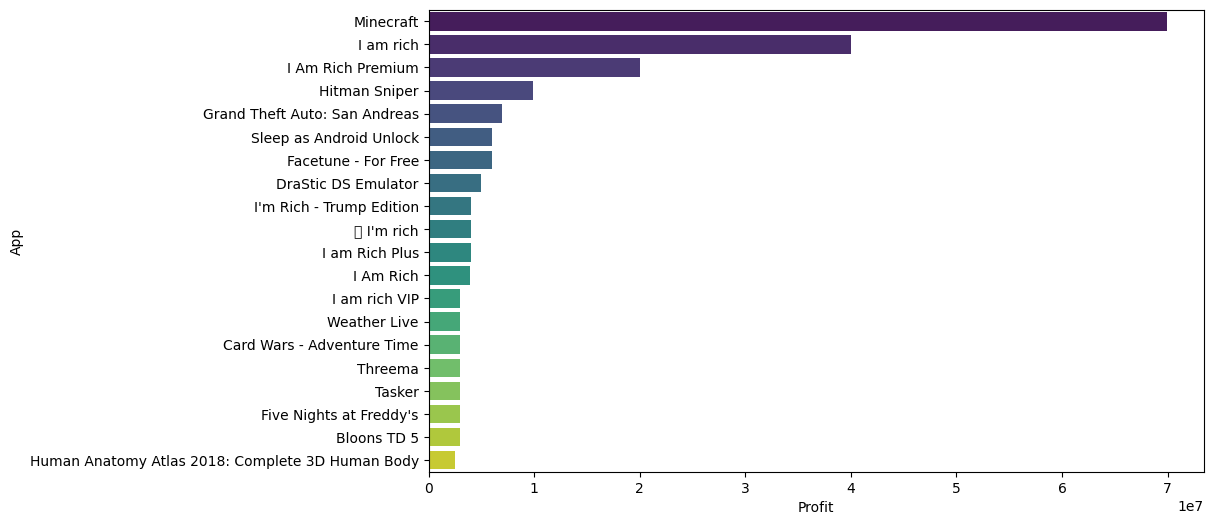

In [94]:
import warnings
warnings.filterwarnings("ignore")

subset = df[['App', 'Installs', 'Price'] ]
subset['Profit'] = subset['Installs'] * subset['Price']
subset = subset.sort_values('Profit', ascending=False).head(20)
subset

plt.figure(figsize=(10,6))
sns.barplot(data=subset, x="Profit", y="App", palette='viridis')
plt.xlabel('Profit')
plt.ylabel('App')
plt.show()


> Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

> A: Since in the dataset I just have last update feature which includes a date, and this date does not say anything about when was launched the app, I do not have enough information to answer this question.